<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#locally" data-toc-modified-id="locally-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>locally</a></span></li><li><span><a href="#final-result-here" data-toc-modified-id="final-result-here-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>final result here</a></span></li><li><span><a href="#model" data-toc-modified-id="model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model</a></span></li></ul></div>

Continue from "taiko_eda" notebook.

Click <font color='red'> "final result here" </font> from above link.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import time
import sys
import math

from scipy.stats import mode
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime, timedelta
from collections import deque
from tqdm import tqdm

LEFT_PATH = '../data/bb_left_forearm_csv/'
RIGHT_PATH = '../data/bb_right_forearm_csv/'
TABLE_PATH = '../data/taiku_tables/'
PATH = '../data/bb_capture/'
OUTPUT_PATH = '../output/'
PROCESSED_PATH = '../data/'

ZERO_ADJ_COL = ['imu_ax', 'imu_ay', 'imu_az', 'imu_gx', 'imu_gy', 'imu_gz', 'msu_ax', 'msu_ay', 'msu_az']

In [2]:
COLORS = ['black', 'red', 'blue', 'yellow', 'green', 'cyan', 'purple']

In [3]:
def adjust_zero(df, modes_dict=None):
    copy_df = df.copy()
    for col in ZERO_ADJ_COL:
        mode_ = mode(copy_df[col])[0] if modes_dict is None else modes_dict[col]
        copy_df[col] = copy_df[col] - mode_
    return copy_df

In [4]:
def get_modes_dict(df):
    modes = {}
    copy_df = df.copy()
    for col in ZERO_ADJ_COL:
        mode_ = mode(copy_df[col])[0]
        modes[col] = mode_
    return modes

In [5]:
files = next(os.walk(LEFT_PATH))[2]
left_df = [
    pd.read_csv(LEFT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
left_df = pd.concat(left_df, ignore_index=True)
left_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_13_25_43.csv',
 'data_2018_03_28_15_52_48.csv',
 'data_2018_03_27_14_48_28.csv',
 'data_2018_03_28_16_59_47.csv',
 'data_2018_03_27_11_37_57.csv',
 'data_2018_03_28_14_52_45.csv',
 'data_2018_03_27_16_12_02.csv',
 'data_2018_03_31_15_29_36.csv']

In [6]:
files = next(os.walk(RIGHT_PATH))[2]
right_df = [
    pd.read_csv(RIGHT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
right_df = pd.concat(right_df, ignore_index=True)
right_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_11_40_03.csv',
 'data_2018_03_28_16_59_37.csv',
 'data_2018_03_27_14_50_24.csv',
 'data_2018_03_28_14_52_43.csv',
 'data_2018_03_31_15_29_27.csv',
 'data_2018_03_27_16_14_52.csv',
 'data_2018_03_28_15_52_55.csv',
 'data_2018_03_27_13_20_28.csv']

In [7]:
song_df = pd.read_csv(TABLE_PATH + 'taiko_song_1_info.csv')
song_df.drop(['#', 'separator'], axis=1, inplace=True)
song_df.columns = ['bar', 'bpm', 'time_unit', 'timestamp', 'label', 'continuous', 'value']
song_df.head(10)

,bar,bpm,time_unit,timestamp,label,continuous,value
0,1,123,0.2439,0.0000,1,0,1
1,1,123,0.2439,0.2439,0,0,0
2,1,123,0.2439,0.4878,0,0,0
3,1,123,0.2439,0.7317,0,0,0
4,1,123,0.2439,0.9756,1,0,1
5,1,123,0.2439,1.2195,0,0,0
6,1,123,0.2439,1.4634,0,0,0
7,1,123,0.2439,1.7073,0,0,0
8,2,123,0.2439,1.9512,1,0,1
9,2,123,0.2439,2.1951,0,0,0


In [8]:
time_unit = song_df['time_unit'][0]
bar_unit = time_unit * 8

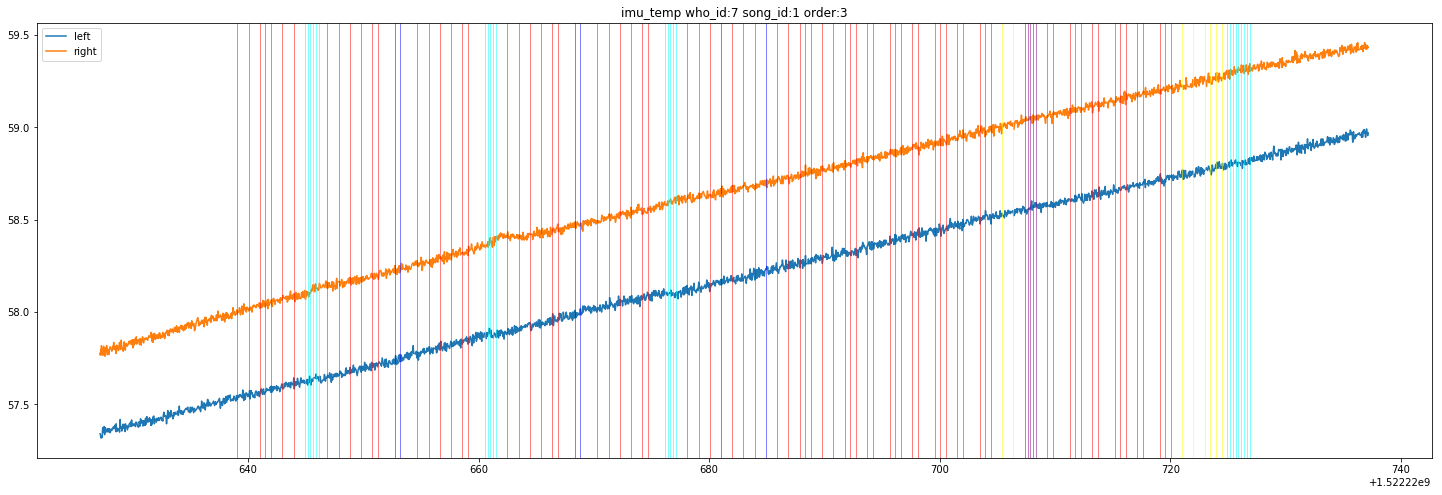

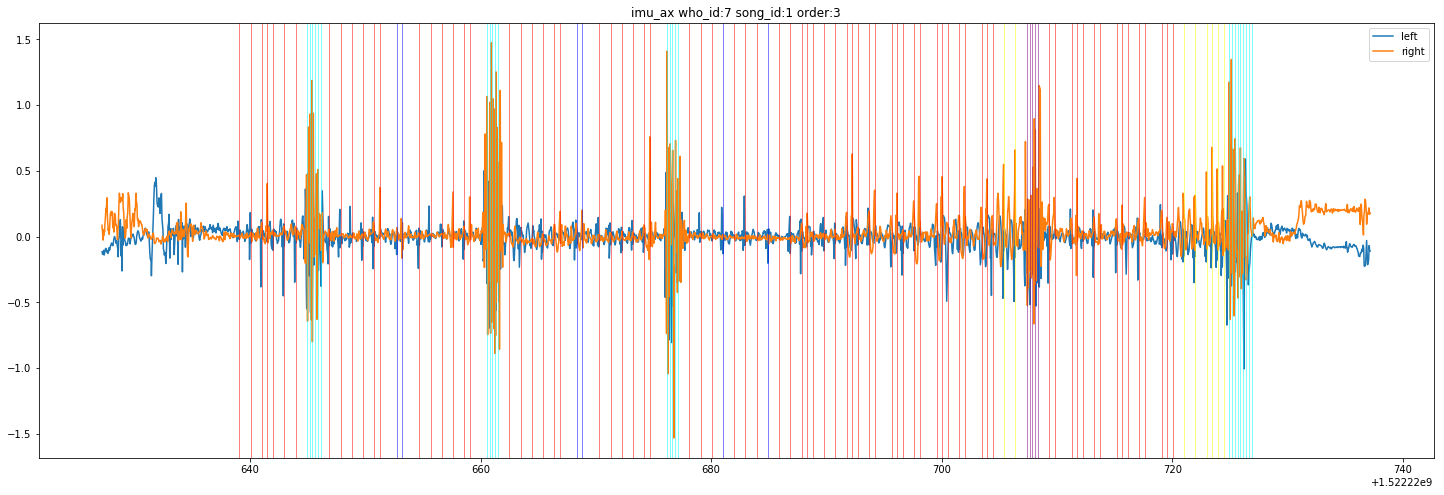

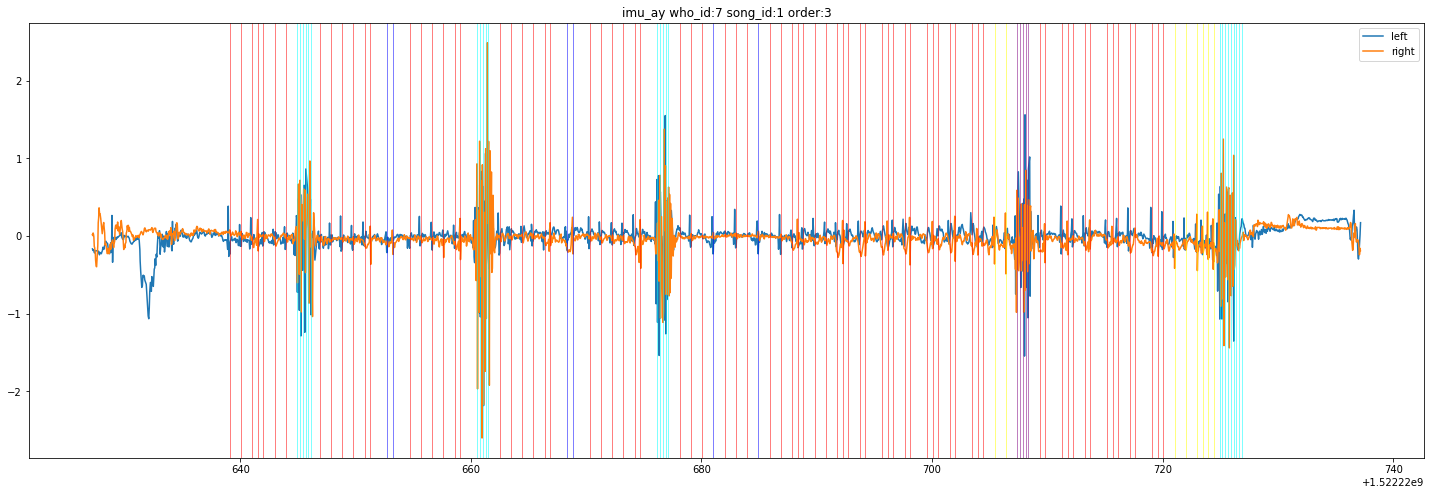

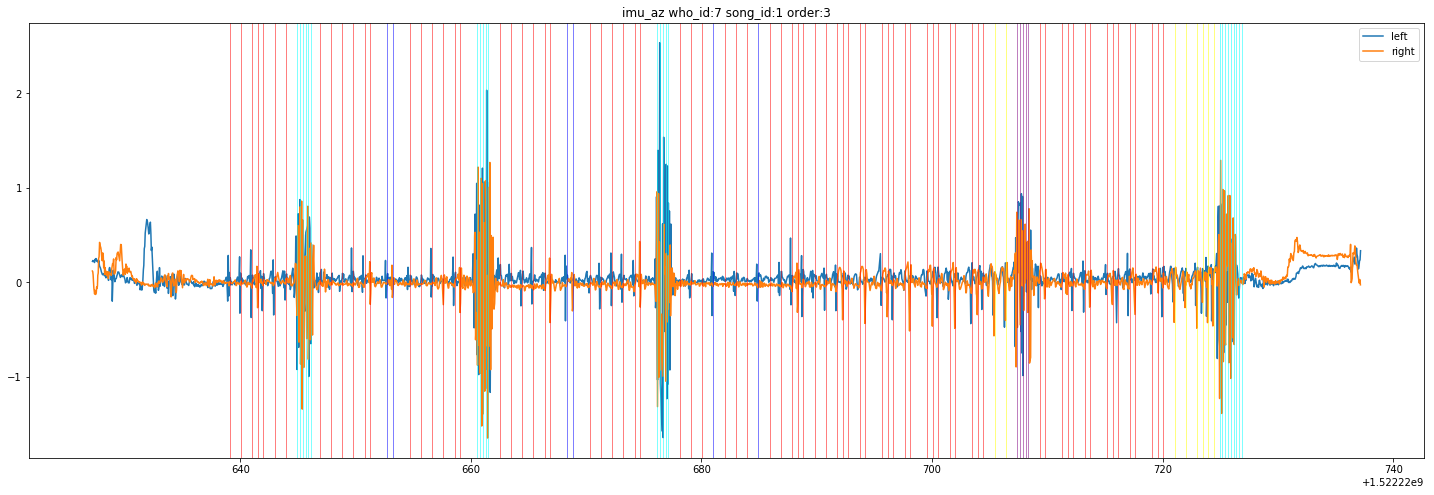

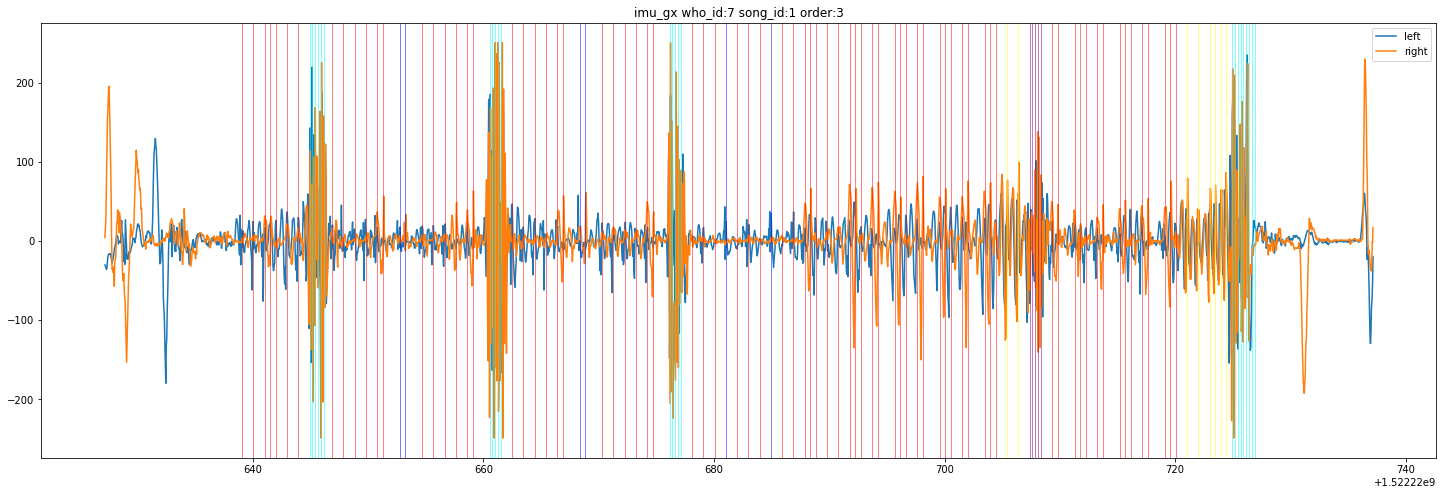

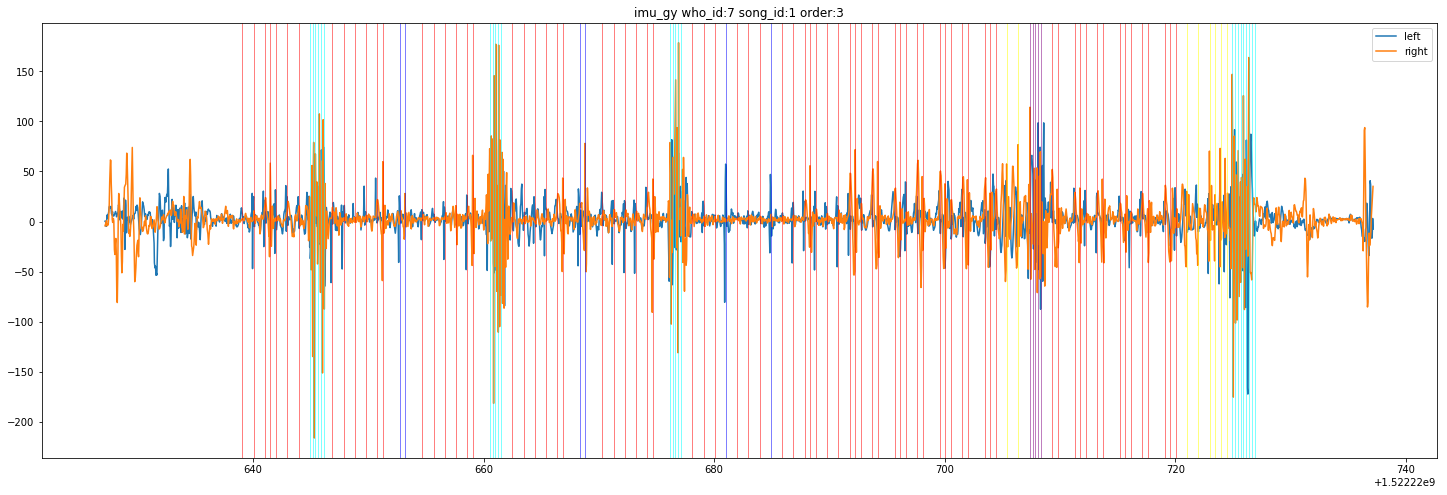

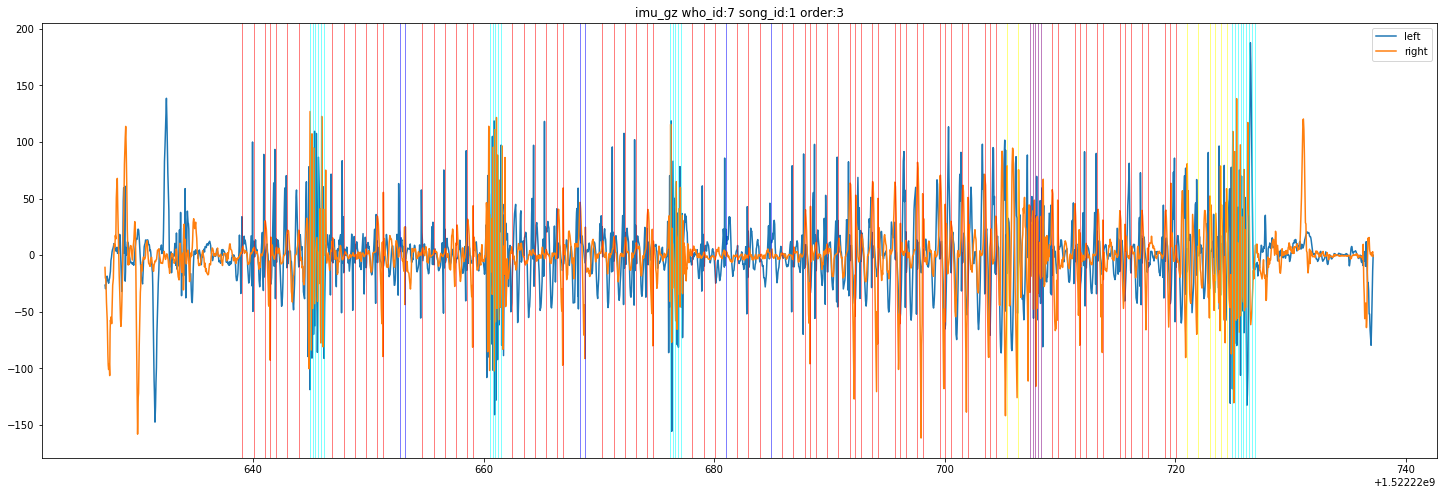

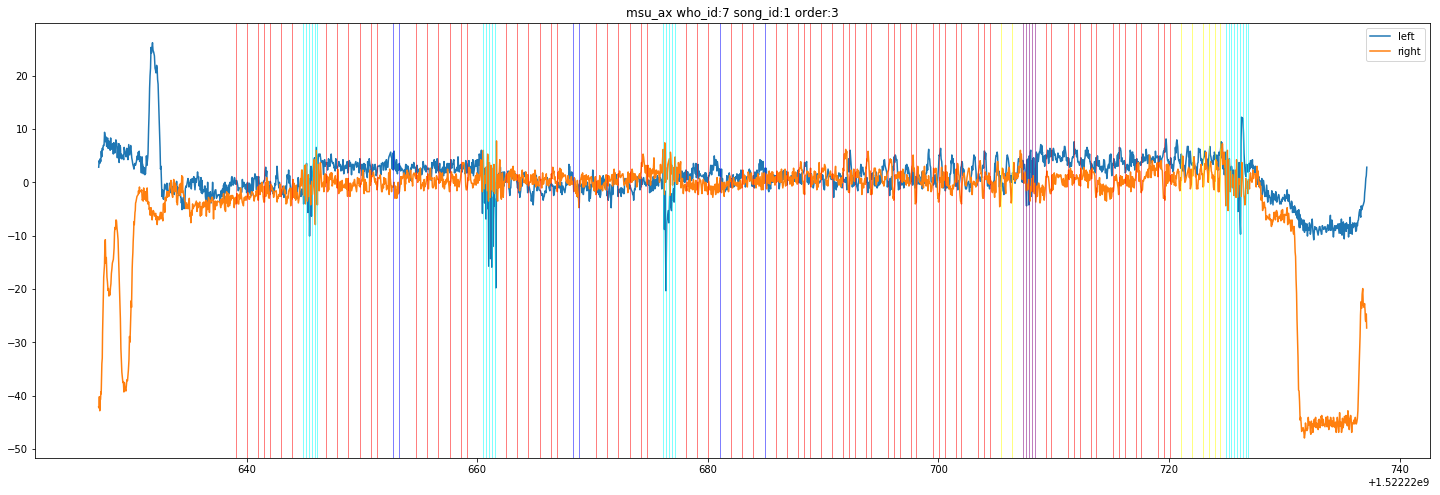

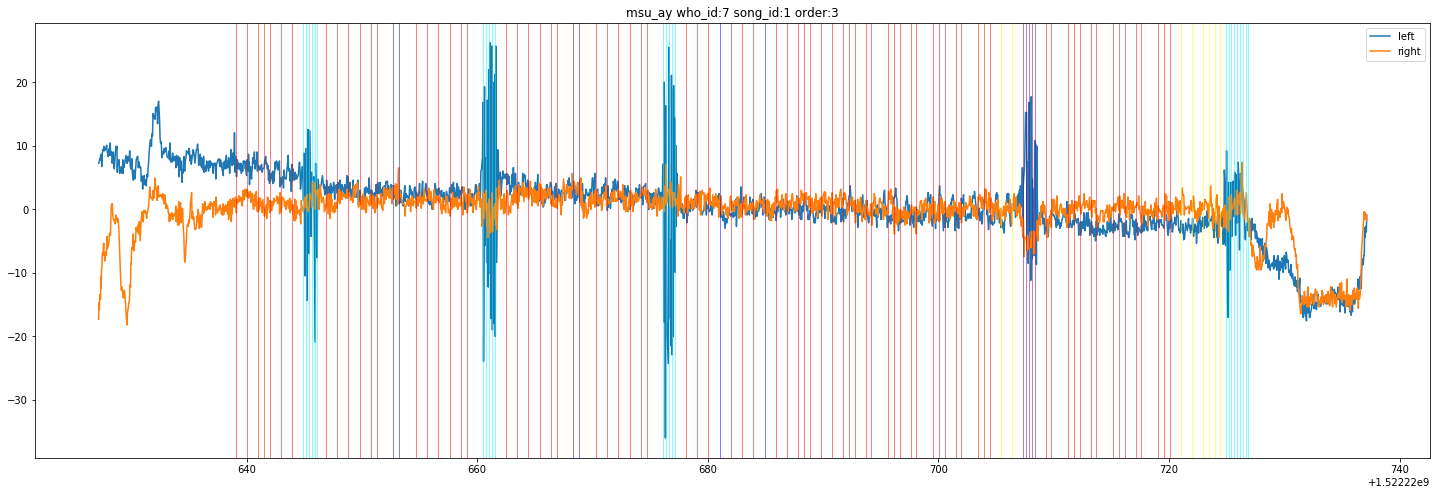

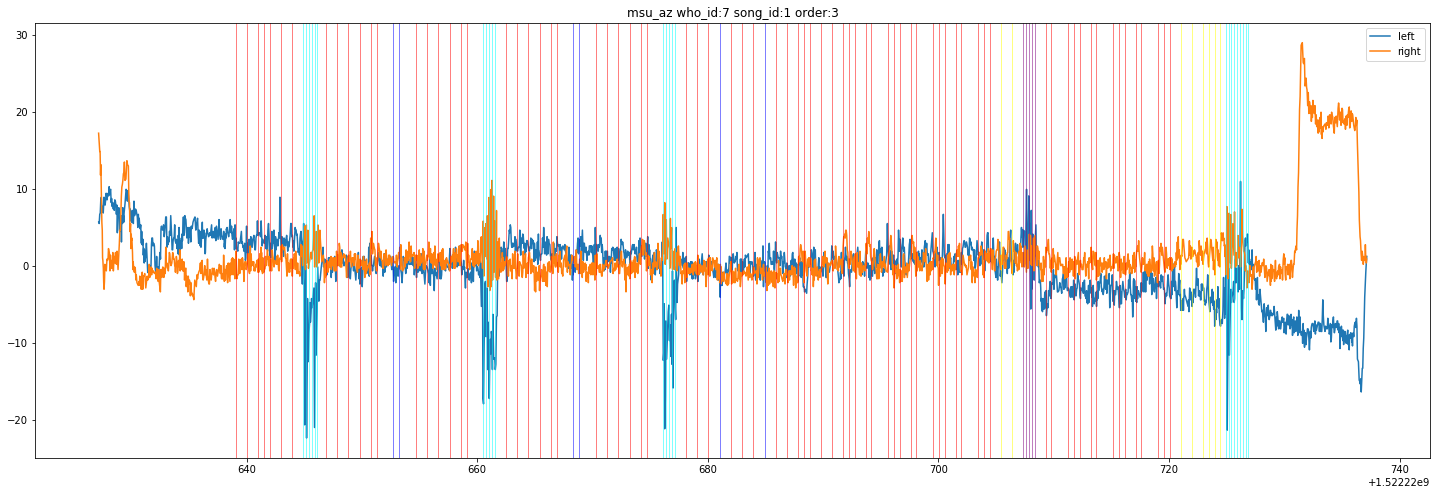

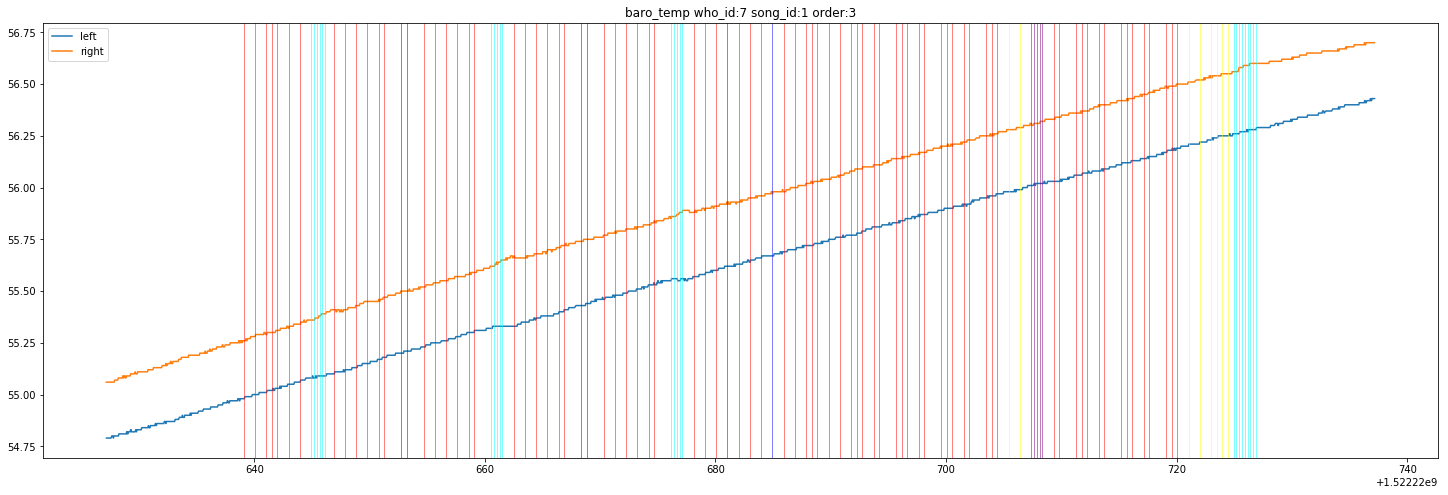

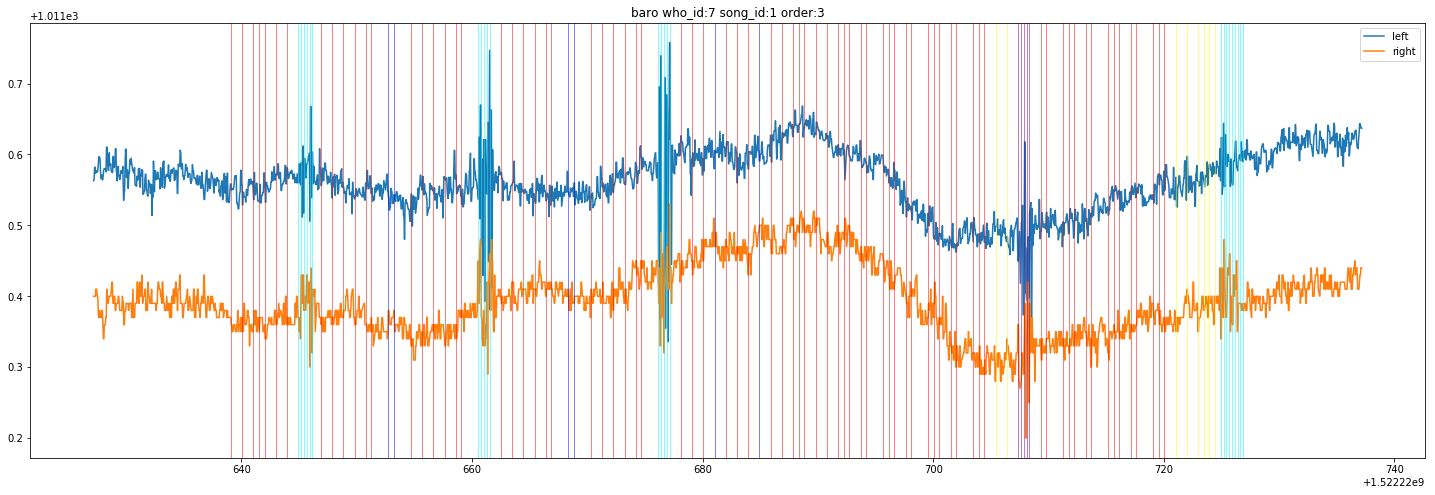

In [9]:
# the times are picked by artificial observation
first_hit_time = 1522220639.08
start_time = 1522220627.1636708
end_time = start_time + 110

for col in left_df:
    if col != 'timestamp' and col != 'wall_time':
        plt.figure(figsize=(25, 8))

        # retrieve left arm info
        play_df = left_df[(left_df['timestamp'] >= start_time)
                          & (left_df['timestamp'] <= end_time)]
        
        play_df = adjust_zero(play_df)
        plt.plot(play_df['timestamp'], play_df[col], label='left')

        # retrieve right arm info
        play_df = right_df[(right_df['timestamp'] >= start_time)
                           & (right_df['timestamp'] <= end_time)]
        
        play_df = adjust_zero(play_df)        
        plt.plot(play_df['timestamp'], play_df[col], label='right')

        # draw vertical mark line
        for i in range(len(song_df)):
            row = song_df.iloc[i]
            hit_type = int(row['label'])
            if hit_type > 0:
                plt.axvline(
                    first_hit_time + row['timestamp'],
                    color=COLORS[hit_type],
                    lw=0.5)
#             print(row)

        plt.legend()
        save_name = '%s who_id:%d song_id:%d order:%d' % (col, 7, 1, 3)
        plt.title(save_name)
        #       plt.savefig(directory + '/' + save_name + '.png')
        
        plt.show()
        plt.close()

In [10]:
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]

left_modes = get_modes_dict(play_df)
    
play_df = adjust_zero(play_df)
left_rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
left_rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
left_rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
388062,1.522221e+09,-0.116,-0.165,0.221,0.299202
388063,1.522221e+09,-0.135,-0.185,0.231,0.325286
388064,1.522221e+09,-0.132,-0.176,0.221,0.311835
388065,1.522221e+09,-0.105,-0.200,0.224,0.318121
388066,1.522221e+09,-0.141,-0.217,0.209,0.332642
388067,1.522221e+09,-0.120,-0.191,0.243,0.331557
388068,1.522221e+09,-0.104,-0.189,0.231,0.316066
388069,1.522221e+09,-0.090,-0.190,0.251,0.327416
388070,1.522221e+09,-0.092,-0.189,0.224,0.307182
388071,1.522221e+09,-0.118,-0.190,0.221,0.314428


In [11]:
play_df = right_df[(right_df['timestamp'] >= start_time)
                   & (right_df['timestamp'] <= end_time)]
right_modes = get_modes_dict(play_df)
play_df = adjust_zero(play_df)
right_rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
right_rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
right_rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
314655,1.522221e+09,0.086,0.018,0.119,0.147922
314656,1.522221e+09,0.046,0.006,0.112,0.121227
314657,1.522221e+09,0.016,0.040,0.078,0.089107
314658,1.522221e+09,-0.027,0.022,0.000,0.034828
314659,1.522221e+09,0.014,-0.009,-0.060,0.062266
314660,1.522221e+09,0.009,-0.136,-0.102,0.170238
314661,1.522221e+09,0.055,-0.144,-0.124,0.197831
314662,1.522221e+09,0.037,-0.183,-0.084,0.204729
314663,1.522221e+09,0.094,-0.221,-0.108,0.263327
314664,1.522221e+09,0.122,-0.311,-0.129,0.358115


# locally

In [12]:
time_samples = []
tm = start_time
while tm <= end_time:
    time_samples.append(tm)
    tm += time_unit

In [13]:
events = []

# spot vertical mark lines
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        events.append((first_hit_time + row['timestamp'], hit_type))

In [14]:
# access particular folder, if doesn't exist, create it
directory = OUTPUT_PATH + 'bb_capture.capture_2018_03_28_15_03_47'
if not os.path.exists(directory):
    os.makedirs(directory)

In [15]:
STAT_COLS = ['AI', 'VI', 'SMA', 'AAE', 'ARE']

In [16]:
def FFT(data):
    freqx = np.fft.fft(data) / math.sqrt(len(data))
    energy = np.sum(np.abs(freqx)**2)
    return energy

In [17]:
def get_statical_feature(rms_df):
    rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
    rms_df['a_rms'] = (
        play_df['imu_ax'] * play_df['imu_ax'] +
        play_df['imu_ay'] * play_df['imu_ay'] +
        play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
    rms_df['g_rms'] = (
        play_df['imu_gx'] * play_df['imu_gx'] +
        play_df['imu_gy'] * play_df['imu_gy'] +
        play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
    ai = rms_df['a_rms'].sum() / len(rms_df)
    vi = math.pow(rms_df['a_rms'].sum() - ai, 2) / len(rms_df)
    sma = (rms_df['imu_ax'].apply(lambda x: abs(x)).sum() +
           rms_df['imu_ay'].apply(lambda x: abs(x)).sum() +
           rms_df['imu_az'].apply(lambda x: abs(x)).sum()) / len(rms_df)
    aae = FFT(rms_df['a_rms']) / len(rms_df)
    are = FFT(rms_df['g_rms']) / len(rms_df)
    
    return [ai, vi, sma, aae, are]

In [18]:
stat_df = pd.DataFrame(columns=['hit_type', 'hand_side'] + STAT_COLS)
LEFT_HAND = 'left'
RIGHT_HAND = 'right'
N = len(events)
for id_, tm in enumerate(events):
    event_time = events[id_][0]
    hit_type = events[id_][1]
    local_start_time = event_time - bar_unit / 4
    local_end_time = event_time + bar_unit / 4

#     fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(15, 8))

    # left arm
    play_df = left_df[(left_df['timestamp'] >= local_start_time)
                      & (left_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, left_modes)
    
    stat_df.loc[2 * id_] = [hit_type, LEFT_HAND] + get_statical_feature(left_rms_df)
    
    # right arm
    play_df = right_df[(right_df['timestamp'] >= local_start_time)
                      & (right_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, right_modes)
    
    stat_df.loc[2 * id_ + 1] = [hit_type, RIGHT_HAND] + get_statical_feature(rms_df) 
    
stat_df['hit_type'] = stat_df['hit_type'].astype(np.int8)
stat_df

,hit_type,hand_side,AI,VI,SMA,AAE,ARE
0,1,left,0.124705,0.265192,0.190211,0.028881,582.863065
1,1,right,0.043232,0.037465,0.055000,0.002162,37.883133
2,1,left,0.098264,0.241751,0.145037,0.016263,1145.443437
3,1,right,0.040615,0.029775,0.060700,0.001953,74.972849
4,1,left,0.134339,0.289753,0.203000,0.034544,1315.898625
5,1,right,0.105447,0.278388,0.159444,0.019736,1440.762761
6,1,left,0.120748,0.248630,0.184947,0.018577,1599.822358
7,1,right,0.105633,0.279372,0.160111,0.020716,1456.778754
8,1,left,0.103715,0.247839,0.159240,0.014909,1409.202926
9,1,right,0.050412,0.053480,0.076304,0.004601,210.336228


# final result here

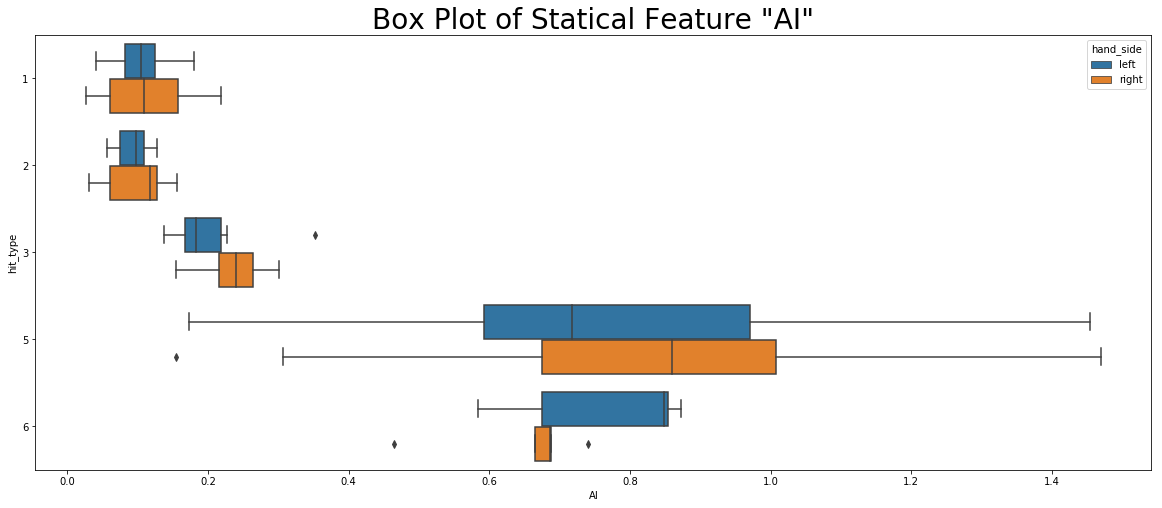

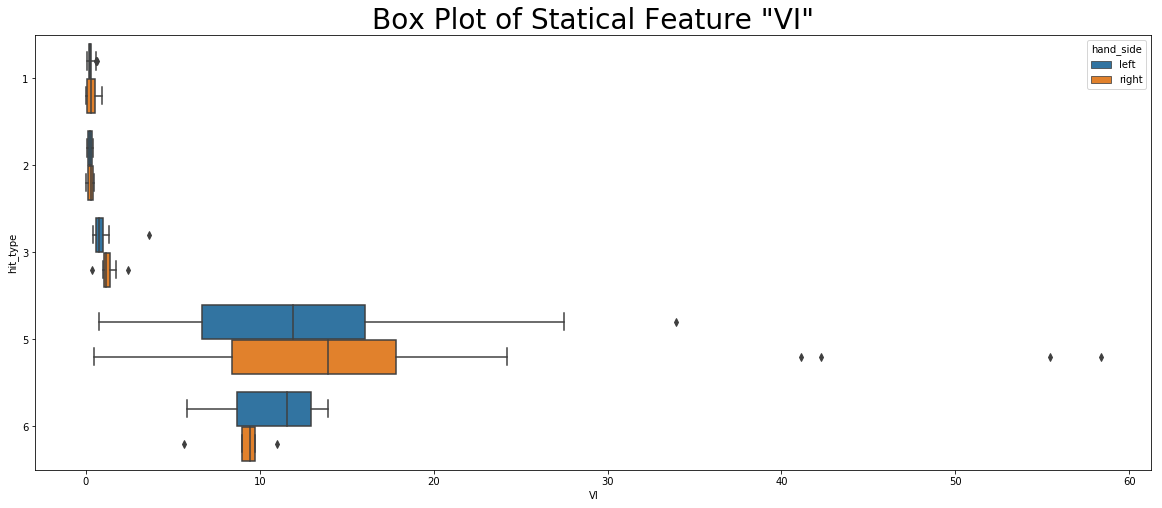

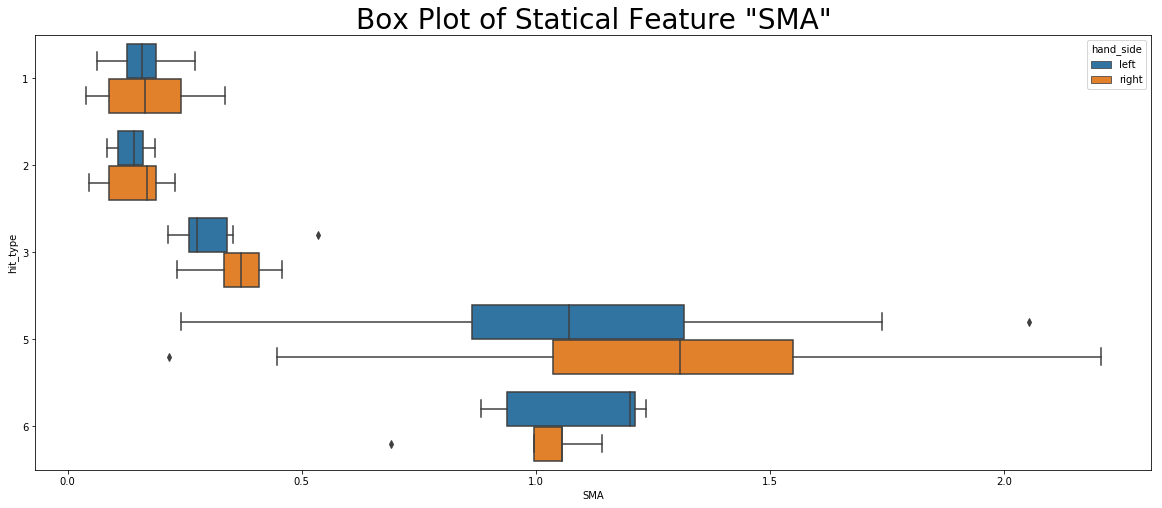

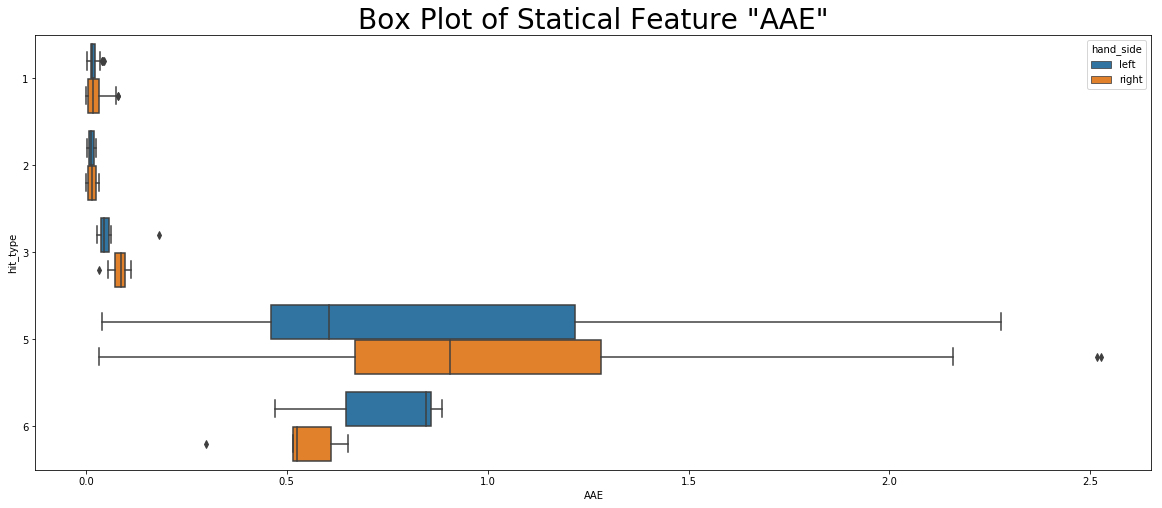

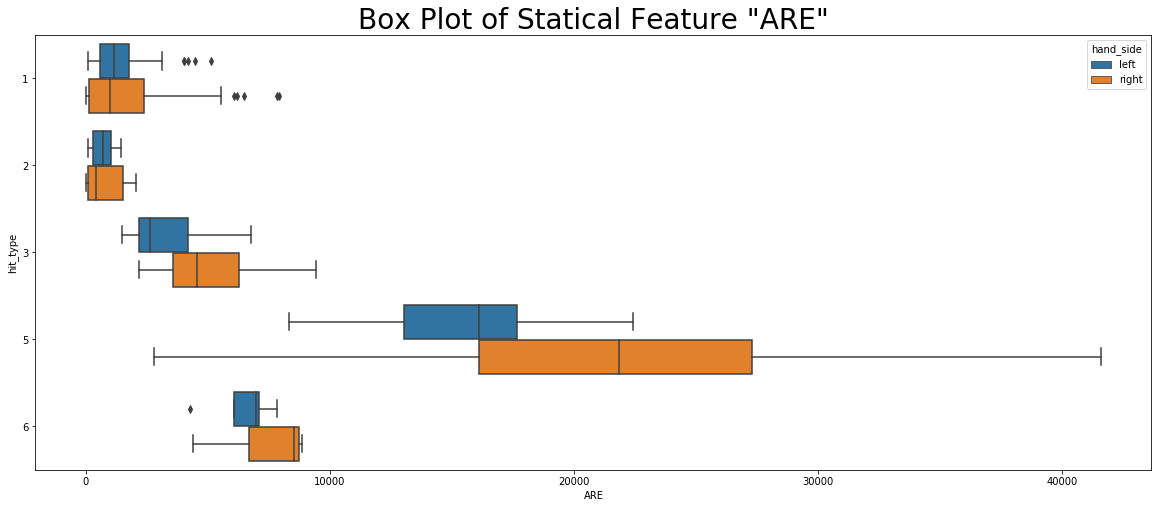

In [19]:
for col in STAT_COLS:
    plt.figure(figsize=(20, 8))
    sns.boxplot(y='hit_type', x=col, orient='h', data=stat_df, hue='hand_side')
    plt.title('Box Plot of Statical Feature \"%s\"' % (col), fontsize=28)
    plt.show()